In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


In [65]:
df = pd.read_csv(r"G:\My Drive\01. MS in Data Analytics CSP\02. DAT 510 624 Systems Analysis and Design\Price_CSV.csv")

In [66]:
df.describe

<bound method NDFrame.describe of              Date Stock  3-Day MA  5-Day MA  8-Day MA  10-Day MA  12-Day MA  \
0       11/7/2024  NVDA    144.80    141.17    139.90     140.13     140.10   
1       11/6/2024  NVDA    140.52    137.95    138.86     139.28     139.66   
2       11/5/2024  NVDA    137.12    136.69    138.35     138.67     139.50   
3       11/4/2024  NVDA    134.74    136.96    138.41     139.04     139.34   
4       11/1/2024  NVDA    135.83    137.85    138.85     139.81     139.42   
...           ...   ...       ...       ...       ...        ...        ...   
12585  11/13/2014  AMZN     15.67     15.45     15.26      15.26      15.19   
12586  11/12/2014  AMZN     15.48     15.25     15.19      15.17      15.10   
12587  11/11/2014  AMZN     15.28     15.10     15.15      15.09      15.01   
12588  11/10/2014  AMZN     15.03     15.01     15.07      15.01      14.91   
12589   11/7/2014  AMZN     14.88     15.02     15.00      14.93      14.94   

       15-Day MA 

In [67]:
print(df.head(5))



        Date Stock  3-Day MA  5-Day MA  8-Day MA  10-Day MA  12-Day MA  \
0  11/7/2024  NVDA    144.80    141.17    139.90     140.13     140.10   
1  11/6/2024  NVDA    140.52    137.95    138.86     139.28     139.66   
2  11/5/2024  NVDA    137.12    136.69    138.35     138.67     139.50   
3  11/4/2024  NVDA    134.74    136.96    138.41     139.04     139.34   
4  11/1/2024  NVDA    135.83    137.85    138.85     139.81     139.42   

   15-Day MA  30-Day MA  35-Day MA  40-Day MA  45-Day MA  50-Day MA  \
0     140.44     134.61     132.54     130.54     128.33     126.67   
1     139.64     133.78     131.65     129.80     127.41     126.20   
2     138.98     133.04     130.73     129.08     126.53     125.86   
3     138.43     132.41     130.04     128.28     125.82     125.59   
4     138.56     131.75     129.49     127.54     125.45     125.45   

   60-Day MA   Price  
0     126.67  148.88  
1     126.15  145.61  
2     125.66  139.91  
3     125.15  136.05  
4     124.63 

In [68]:
# Separate numeric and non-numeric columns
numeric_cols = df_imputed.select_dtypes(include=['number']).columns
non_numeric_cols = df_imputed.select_dtypes(exclude=['number']).columns

# Apply imputation only to numeric columns
imputer = SimpleImputer(strategy='mean')
df_imputed[numeric_cols] = imputer.fit_transform(df_imputed[numeric_cols])

# Non-numeric columns remain unchanged (or handle them separately if needed)
# df_imputed[non_numeric_cols] = ... (optional handling for non-numeric data)

In [69]:
# Check if any missing values remain
missing_data_imputed = df_imputed.isnull().sum()
print(missing_data_imputed)

Date         0
Stock        0
3-Day MA     0
5-Day MA     0
8-Day MA     0
10-Day MA    0
12-Day MA    0
15-Day MA    0
30-Day MA    0
35-Day MA    0
40-Day MA    0
45-Day MA    0
50-Day MA    0
60-Day MA    0
Price        0
dtype: int64


In [70]:
df.info

<bound method DataFrame.info of              Date Stock  3-Day MA  5-Day MA  8-Day MA  10-Day MA  12-Day MA  \
0       11/7/2024  NVDA    144.80    141.17    139.90     140.13     140.10   
1       11/6/2024  NVDA    140.52    137.95    138.86     139.28     139.66   
2       11/5/2024  NVDA    137.12    136.69    138.35     138.67     139.50   
3       11/4/2024  NVDA    134.74    136.96    138.41     139.04     139.34   
4       11/1/2024  NVDA    135.83    137.85    138.85     139.81     139.42   
...           ...   ...       ...       ...       ...        ...        ...   
12585  11/13/2014  AMZN     15.67     15.45     15.26      15.26      15.19   
12586  11/12/2014  AMZN     15.48     15.25     15.19      15.17      15.10   
12587  11/11/2014  AMZN     15.28     15.10     15.15      15.09      15.01   
12588  11/10/2014  AMZN     15.03     15.01     15.07      15.01      14.91   
12589   11/7/2014  AMZN     14.88     15.02     15.00      14.93      14.94   

       15-Day MA  3

In [71]:
# Select features and target variable
features = df_imputed[['3-Day MA', '5-Day MA', '8-Day MA', '10-Day MA', '12-Day MA', '15-Day MA', 
                       '30-Day MA', '35-Day MA', '40-Day MA', '45-Day MA', '50-Day MA', '60-Day MA']]
target = df_imputed['Price']

In [72]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [73]:
# Apply Principal Component Analysis PCA
pca = PCA(n_components=5)  # You can adjust this number based on variance explained
pca_features = pca.fit_transform(scaled_features)



In [74]:
# Show the explained variance ratio to understand the contribution of each component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [9.98496428e-01 1.21573896e-03 1.62839225e-04 6.52964869e-05
 2.71744717e-05]


In [75]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(pca_features, target, test_size=0.2, random_state=42)


In [76]:
# Show the shape of training and testing data
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (10072, 5), Test data shape: (2518, 5)


In [89]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

# Dictionary to store results
model_results = {}

# Train models and evaluate performance
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store the results with formatted R² and MSE
    model_results[model_name] = {'R²': f"{r2:.6f}", 'MSE': f"{mse:.6f}"}

# Create a DataFrame to display the results
Performance_comparison_df = pd.DataFrame(model_results).T  # Transpose to get models as rows

# Display the model comparison table
print(Performance_comparison_df)


                                   R²         MSE
Linear Regression            0.986490   99.644121
Decision Tree Regressor      0.947643  386.172166
Random Forest Regressor      0.979630  150.242734
Gradient Boosting Regressor  0.949737  370.728308
Support Vector Regressor     0.992160   57.829055


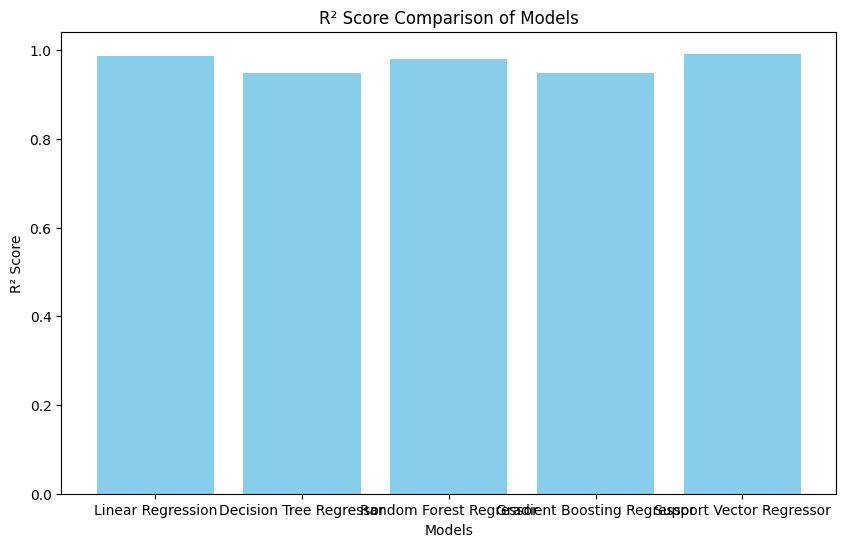

In [93]:
import matplotlib.pyplot as plt

# Data
models = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 
          'Gradient Boosting Regressor', 'Support Vector Regressor']
r2_scores = [0.986490, 0.947643, 0.979630, 0.949737, 0.992160]

# Plotting R²
plt.figure(figsize=(10,6))
plt.bar(models, r2_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('R² Score Comparison of Models')
plt.show()


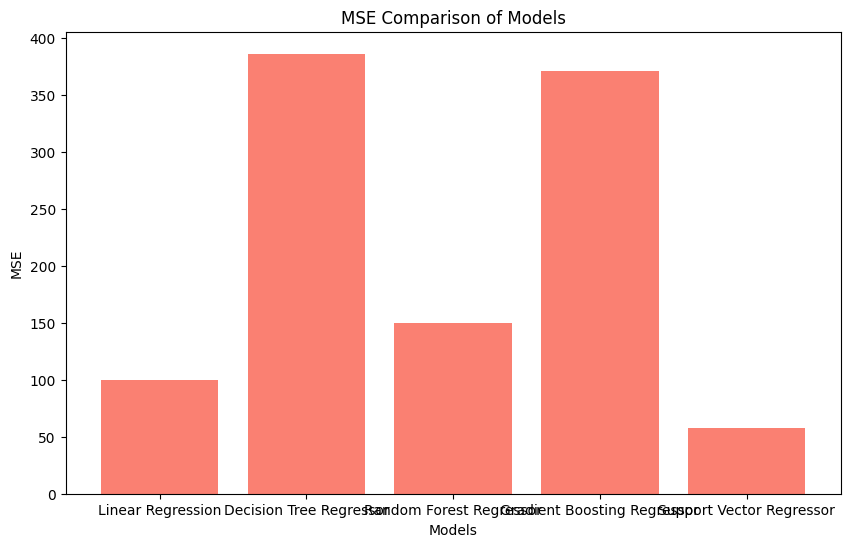

In [94]:
# Data
mse_scores = [99.644121, 386.172166, 150.242734, 370.728308, 57.829055]

# Plotting MSE
plt.figure(figsize=(10,6))
plt.bar(models, mse_scores, color='salmon')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Comparison of Models')
plt.show()


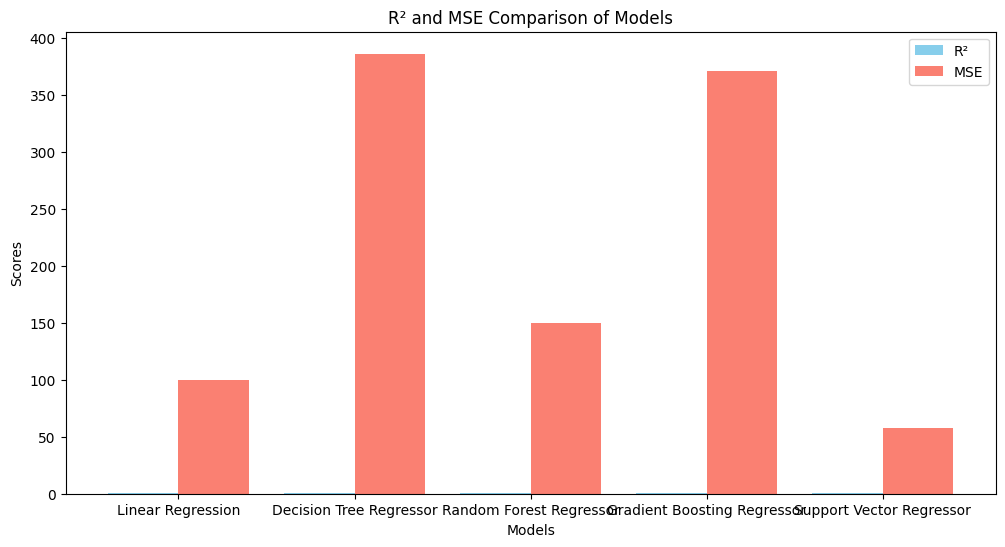

In [95]:
import numpy as np

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Set positions for each bar
x = np.arange(len(models))
width = 0.4  # the width of the bars

# Plotting side-by-side bars for R² and MSE
ax.bar(x - width/2, r2_scores, width, label='R²', color='skyblue')
ax.bar(x + width/2, mse_scores, width, label='MSE', color='salmon')

# Labeling the chart
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('R² and MSE Comparison of Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()


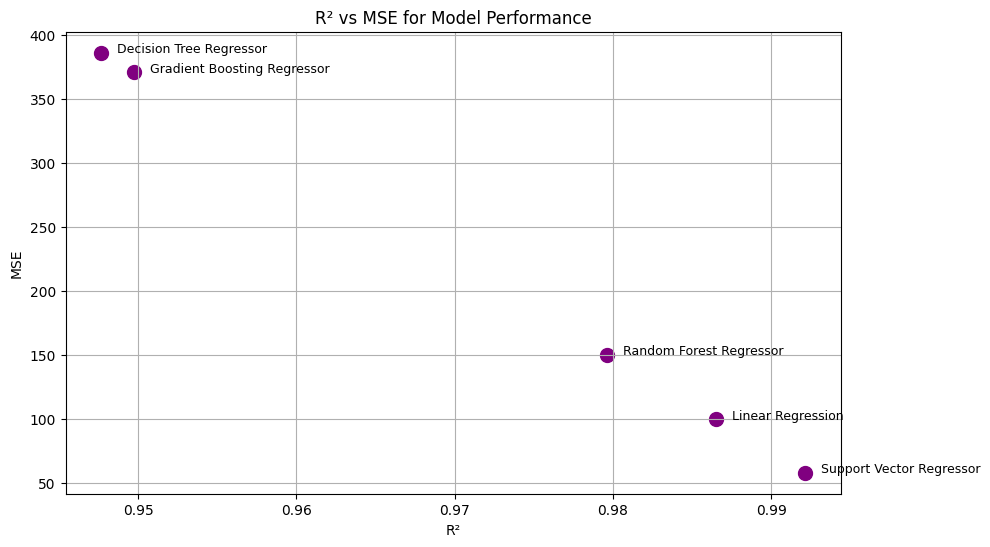

In [97]:
# Scatter plot of R² vs MSE
plt.figure(figsize=(10,6))
plt.scatter(r2_scores, mse_scores, color='purple', s=100)

# Adding model labels on the scatter plot
for i, model in enumerate(models):
    plt.text(r2_scores[i] + 0.001, mse_scores[i], model, fontsize=9)

plt.xlabel('R²')
plt.ylabel('MSE')
plt.title('R² vs MSE for Model Performance')
plt.grid(True)
plt.show()


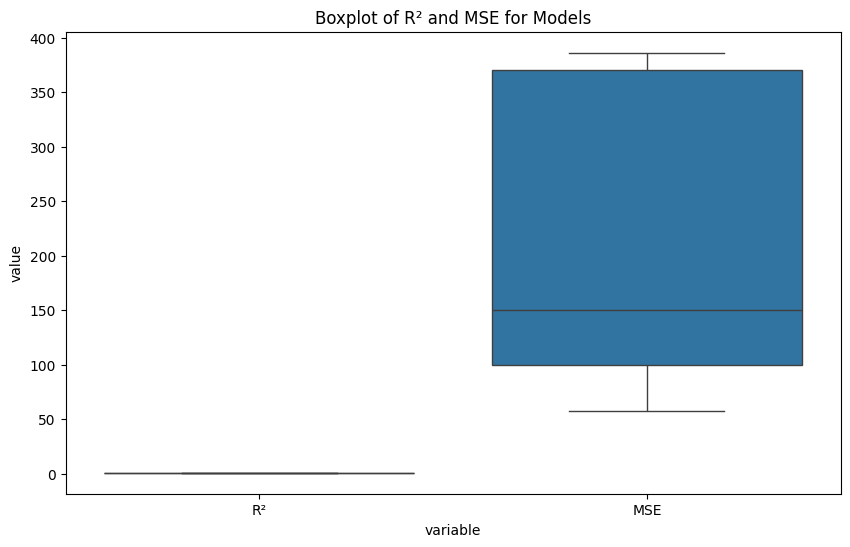

In [98]:
import seaborn as sns

# Create a DataFrame for easy plotting
results_df = pd.DataFrame({
    'Model': models,
    'R²': r2_scores,
    'MSE': mse_scores
})

# Reshape the data for the boxplot
melted_df = results_df.melt(id_vars="Model", value_vars=['R²', 'MSE'])

# Plot boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='variable', y='value', data=melted_df)
plt.title('Boxplot of R² and MSE for Models')
plt.show()


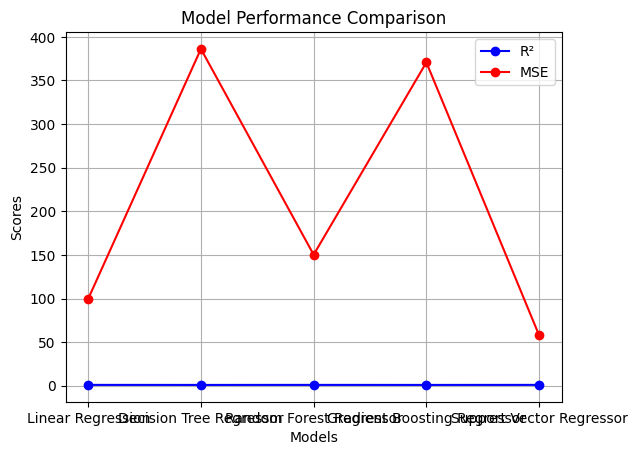

In [99]:
# This is just an example with a single point per model
# Create a line plot for R² and MSE comparison over multiple runs (here it's just one run)
plt.plot(models, r2_scores, marker='o', label='R²', color='blue')
plt.plot(models, mse_scores, marker='o', label='MSE', color='red')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()


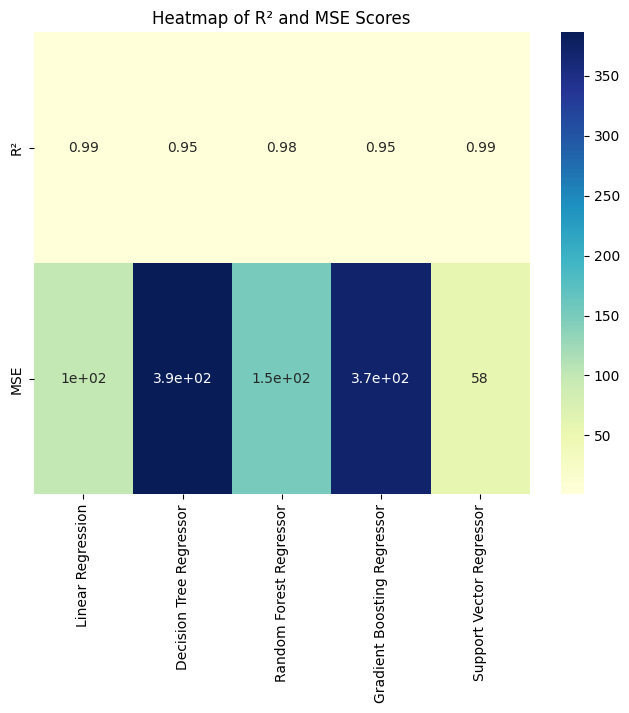

In [100]:
import seaborn as sns
import numpy as np

# Combine R² and MSE into a 2D matrix for the heatmap
scores_matrix = np.array([r2_scores, mse_scores])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(scores_matrix, annot=True, xticklabels=models, yticklabels=['R²', 'MSE'], cmap='YlGnBu', cbar=True)
plt.title('Heatmap of R² and MSE Scores')
plt.show()
